In [85]:
import numpy as np
import pandas as pd
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as utils
import matplotlib.pyplot as plt
import statistics 
from statistics import mode
from torch.optim.lr_scheduler import StepLR
%matplotlib inline

In [86]:
def train_epoch(model, opt, criterion, batch_size=100):
    model.train()
    losses = []
    for index in range(0, x_train.shape[0], batch_size):
        x_batch = x_train[index:index + batch_size, :]
        label_batch = labels[index:index + batch_size, :]
        opt.zero_grad()
        prediction = model(x_batch)
        loss = criterion(prediction,label_batch)
        loss.backward()
        opt.step()
        losses.append(loss.item())
    losses = sum(losses)/len(losses)
    return losses

In [87]:
def baselinePrediction(output1):
    predictions_array=[]
    for i in range(5):
        test=np.random.randint(2, size=len(x_test))
        test = list(test)
        predictions_array.append(test)
    predictions_array = np.array(predictions_array)
    print(predictions_array.shape)
    final_prediction =np.zeros(predictions_array.shape[1])
    for i in range(predictions_array.shape[1]):
        temp_list=predictions_array[:,i].tolist()
        final_prediction[i]=mode(temp_list)
    count=0
    for i in range(output1.shape[0]):
        if(output1[i]==final_prediction[i]):
            count = count+1
    print("Accuracy is ", (count/final_prediction.shape[0])*100)
    return (count/final_prediction.shape[0])*100

In [88]:
def testingAccuracy(model,x_test,output1):
    predictions_array=[]
    model = model.eval()
    with torch.no_grad():
        predictions = model(x_test)
    test = np.asarray(predictions)
    
    test[test>0.5]=1
    test[test<=0.5]=0

    count=0
    for i in range(test.shape[0]):
        if(output1[i]==test[i]):
            count = count+1
    print("Accuracy is ", (count/test.shape[0])*100)
    return (count/test.shape[0])*100

In [89]:
#change the dataframe to numpy array to tensor array
def changeToTensor(dataFrame):
    dataFrame= (dataFrame-dataFrame.min())/(dataFrame.max()-dataFrame.min())
    x = dataFrame.values
    x= x.astype('float64')
    x= torch.Tensor(x)
    return x

In [90]:
def preProcess(data):
    data_numpy = data.values
    labels = data_numpy[:,-1]
    labels= labels.astype('float64')
    #labels= torch.Tensor(labels)
    data_numpy = data.drop(['date','Occupancy'],axis=1)
    features = changeToTensor(data_numpy)
    return features, labels

In [91]:
class Net_2Layer(nn.Module):
    def __init__(self,size,H_size,H2_size):
        super(Net_2Layer, self).__init__()
        self.fc1 = nn.Linear(size,H_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(H_size,H2_size)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(H2_size,1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [92]:
### create a model with pytorch#####
class Net_H(nn.Module):
    def __init__(self,size,H_size):
        super(Net_H, self).__init__()
        self.fc1 = nn.Linear(size,H_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(H_size,1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [93]:
### create a model with pytorch#####
class Net_5(nn.Module):
    def __init__(self,size):
        super(Net_5, self).__init__()
        self.fc1 = nn.Linear(size,5)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(5,1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [94]:
num_epochs = 100

In [95]:
criteria= nn.BCELoss()

In [96]:
train_data = pd.read_csv('train.txt',sep=',')
test_data = pd.read_csv('test.txt',sep=',')

In [97]:
train_data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [98]:
x_train, labels =preProcess(train_data)
labels_accuracy = labels
labels= torch.Tensor(labels)
labels = labels.unsqueeze(1)
print(x_train.shape, labels.shape)

torch.Size([8143, 5]) torch.Size([8143, 1])


In [99]:
x_test, output = preProcess(test_data)

### Part (a) printing the loss value across 100 epochs for batch training

In [100]:
model = Net_5(x_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [101]:
loss_to_plot_batch=[]
for e in range(num_epochs):
    e_losses = train_epoch(model,optimizer ,criteria,x_train.shape[0])
    loss_to_plot_batch.append(e_losses)
    print("For epoch ",e+1,"loss is ",e_losses)

For epoch  1 loss is  0.6157673597335815
For epoch  2 loss is  0.6155251264572144
For epoch  3 loss is  0.615402102470398
For epoch  4 loss is  0.6151551604270935
For epoch  5 loss is  0.6149489879608154
For epoch  6 loss is  0.6147071123123169
For epoch  7 loss is  0.6145627498626709
For epoch  8 loss is  0.6143319010734558
For epoch  9 loss is  0.6140909790992737
For epoch  10 loss is  0.6139413714408875
For epoch  11 loss is  0.6136907935142517
For epoch  12 loss is  0.6134893894195557
For epoch  13 loss is  0.6132476329803467
For epoch  14 loss is  0.6131243109703064
For epoch  15 loss is  0.6128771901130676
For epoch  16 loss is  0.6126319169998169
For epoch  17 loss is  0.6124839782714844
For epoch  18 loss is  0.6122424602508545
For epoch  19 loss is  0.6120601296424866
For epoch  20 loss is  0.6118199229240417
For epoch  21 loss is  0.6116711497306824
For epoch  22 loss is  0.6114254593849182
For epoch  23 loss is  0.611180305480957
For epoch  24 loss is  0.6110564470291138
For

### Part (b) Getting the baseline accuracy for the testing data from randomly generated labels

In [102]:
baseline_accuracy = baselinePrediction(output)

(5, 9752)
Accuracy is  49.81542247744052


In [103]:
baseline_error= 1-(baseline_accuracy/100)
baseline_error_plot=[baseline_error]*100

### Part (c) With the H=5,changed the learning rate and plotted training loss across every epoch for every learning rate considered

Accuracy for the testing data 
Accuracy is  98.93355209187858
Accuracy for the training data
Accuracy is  97.29829301240329
Should stop at index  21


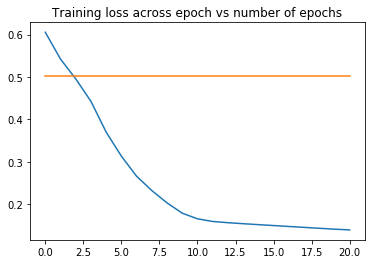

In [104]:
num_epochs = 100
e_losses=[]
loss_across_epoch=[]
model = Net_5(x_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
for e in range(num_epochs):
    e_losses = train_epoch(model,optimizer ,criteria,100)
    scheduler.step()
    loss_across_epoch.append(e_losses)

print("Accuracy for the testing data ")
dummy=testingAccuracy(model,x_test,output)
print("Accuracy for the training data")
dummy=testingAccuracy(model,x_train,labels_accuracy)#train_numpy[:,-1].astype('float64'))
plt.title('Training loss across epoch vs number of epochs')
needed_index= 0
min_change=0.001
for i in range(1,len(loss_across_epoch)):
    if(loss_across_epoch[i-1]-loss_across_epoch[i]< min_change):
        print("Should stop at index ",i)
        needed_index = i
        break
loss_across_epoch=loss_across_epoch[:needed_index]
plt.plot(loss_across_epoch)    
baseline_error_plot1 = baseline_error_plot[:needed_index]
plt.plot(baseline_error_plot1)
plt.show()

### Part (d) Plot of the training loss obtained by considering the entire training data as a batch

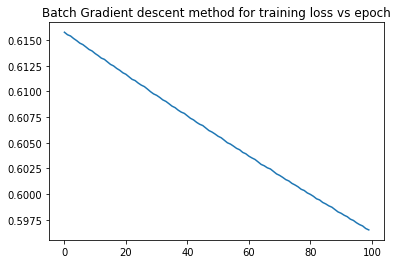

In [105]:
plt.title('Batch Gradient descent method for training loss vs epoch')
plt.plot(loss_to_plot_batch)

### Part (e) Varied the number of hidden layers(H) and created a model for each of it and plotted the training and testing error

Training accuracy for H  1
Accuracy is  78.76703917475132
Testing accuracy for H  1
Accuracy is  78.98892534864643
Training accuracy for H  2
Accuracy is  21.232960825248682
Testing accuracy for H  2
Accuracy is  21.011074651353567
Training accuracy for H  5
Accuracy is  28.52756969175979
Testing accuracy for H  5
Accuracy is  21.800656275635767
Training accuracy for H  10
Accuracy is  90.9247206189365
Testing accuracy for H  10
Accuracy is  70.47785069729287
Training accuracy for H  20
Accuracy is  78.76703917475132
Testing accuracy for H  20
Accuracy is  78.98892534864643


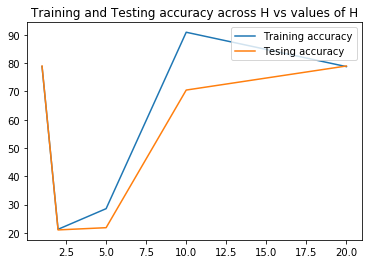

In [106]:
x_axis=[1,2,5,10,20]
training_accuracy_every_H=[]
testing_accuracy_every_H=[]
for H in [1,2,5,10,20]:
    model = Net_H(x_train.shape[1],H)
    optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
    scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
    for e in range(num_epochs):
        e_losses = train_epoch(model,optimizer ,criteria,x_train.shape[0])
        scheduler.step()
    print("Training accuracy for H ",H)
    training_accuracy_every_H.append(testingAccuracy(model,x_train,labels_accuracy))#train_numpy[:,-1].astype('float64')))
    print("Testing accuracy for H ",H)
    testing_accuracy_every_H.append(testingAccuracy(model,x_test,output))
plt.title('Training and Testing accuracy across H vs values of H')
plt.plot(x_axis,training_accuracy_every_H)
plt.plot(x_axis,testing_accuracy_every_H)
plt.legend(['Training accuracy','Tesing accuracy'], loc='upper right')
plt.show()

### Part (f) Changed the BCELoss to MSELoss and performed the training and testing again

In [107]:
criteria= nn.MSELoss()

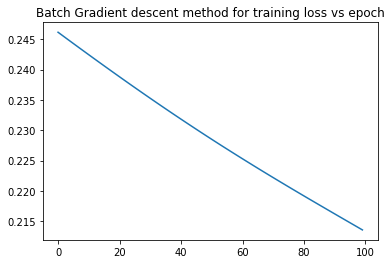

In [108]:
model = Net_5(x_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
loss_to_plot_batch=[]
for e in range(num_epochs):
    e_losses = train_epoch(model,optimizer ,criteria,x_train.shape[0])
    loss_to_plot_batch.append(e_losses)
plt.title('Batch Gradient descent method for training loss vs epoch')
plt.plot(loss_to_plot_batch)

In [109]:
for param in model.parameters ():
    print(param.data)

tensor([[ 0.3779, -0.1793,  0.0726,  0.3474,  0.2938],
        [-0.2532, -0.3656,  0.2963, -0.1894, -0.2834],
        [-0.1404, -0.0217,  0.3465,  0.4599, -0.4314],
        [ 0.5032, -0.3188,  0.0268, -0.2871, -0.2554],
        [ 0.5334,  0.4948,  0.1941, -0.1863,  0.1422]])
tensor([-0.1473, -0.2031,  0.3228, -0.0809,  0.0728])
tensor([[ 0.3082,  0.2379,  0.0841, -0.2115, -0.5512]])
tensor([-0.0850])


Criterai is  MSELoss()
Accuracy is  99.12838392124692
Accuracy for the training data
Accuracy is  98.68598796512342
Should stop at index  10


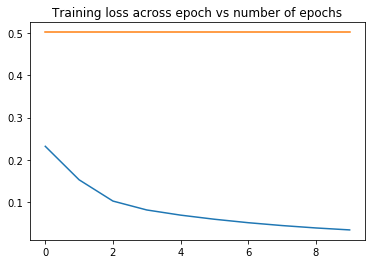

In [110]:

print("Criterai is ",criteria)

e_losses=[]
loss_across_epoch=[]
model = Net_5(x_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
for e in range(num_epochs):
    e_losses = train_epoch(model,optimizer ,criteria,100)
    scheduler.step()
    loss_across_epoch.append(e_losses)

dummy=testingAccuracy(model,x_test,output)
print("Accuracy for the training data")
dummy=testingAccuracy(model,x_train,labels_accuracy)#train_numpy[:,-1].astype('float64'))
plt.title('Training loss across epoch vs number of epochs')

needed_index= 0
min_change=0.001
for i in range(1,len(loss_across_epoch)):
    if(loss_across_epoch[i-1]-loss_across_epoch[i]< min_change):
        print("Should stop at index ",i)
        needed_index = i
        break
loss_across_epoch=loss_across_epoch[:needed_index]
plt.plot(loss_across_epoch)    
baseline_error_plot1 = baseline_error_plot[:needed_index]
plt.plot(baseline_error_plot1)
plt.show()

Accuracy is  97.66670760162103
Accuracy is  90.87366694011484
Accuracy is  95.75095173768882
Accuracy is  85.01845775225596
Accuracy is  96.2790126489009
Accuracy is  86.4540607054963
Accuracy is  98.82107331450325
Accuracy is  98.35931091058244
Accuracy is  98.25617094436939
Accuracy is  94.96513535684987


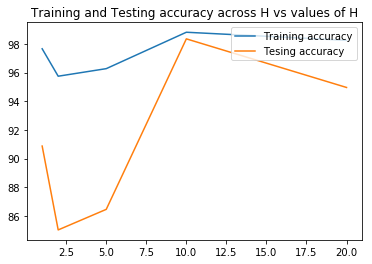

In [111]:

epochs=100
x_axis=[1,2,5,10,20]
training_accuracy_every_H=[]
testing_accuracy_every_H=[]
for H in [1,2,5,10,20]:
    model = Net_H(x_train.shape[1],H)
    optimizer = torch.optim.Adam(model.parameters(),lr=0.1)
    scheduler = StepLR(optimizer, step_size=30, gamma=0.1)
    for e in range(num_epochs):
        e_losses = train_epoch(model,optimizer,criteria,x_train.shape[0])
        scheduler.step()
    training_accuracy_every_H.append(testingAccuracy(model,x_train,labels_accuracy))#train_numpy[:,-1].astype('float64')))
    testing_accuracy_every_H.append(testingAccuracy(model,x_test,output))
plt.title('Training and Testing accuracy across H vs values of H')
plt.plot(x_axis,training_accuracy_every_H)
plt.plot(x_axis,testing_accuracy_every_H)
plt.legend(['Training accuracy','Tesing accuracy'], loc='upper right')
plt.show()

### Part(g) Created a two layer network and obtained the test accuracy for every combination for H1 and H2

In [112]:
criteria= nn.BCELoss()
for H1 in [1,2,5,10,20]:
    for H2 in [15,120,220,230]:
        print()
        print("H1 has ",H1,' neurons and H2 has',H2,' neurons')
        model = Net_2Layer(x_train.shape[1],H1,H2)
        optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
        for e in range(num_epochs):
            e_losses = train_epoch(model,optimizer ,criteria,x_train.shape[0])
        print("Testing accuracy for the 2 layer for the model with H1 ",H1," and H2 ",H2)
        testingAccuracy(model,x_test,output)
        


H1 has  1  neurons and H2 has 15  neurons
Testing accuracy for the 2 layer for the model with H1  1  and H2  15
Accuracy is  78.98892534864643

H1 has  1  neurons and H2 has 120  neurons
Testing accuracy for the 2 layer for the model with H1  1  and H2  120
Accuracy is  78.98892534864643

H1 has  1  neurons and H2 has 220  neurons
Testing accuracy for the 2 layer for the model with H1  1  and H2  220
Accuracy is  89.62264150943396

H1 has  1  neurons and H2 has 230  neurons
Testing accuracy for the 2 layer for the model with H1  1  and H2  230
Accuracy is  88.91509433962264

H1 has  2  neurons and H2 has 15  neurons
Testing accuracy for the 2 layer for the model with H1  2  and H2  15
Accuracy is  88.19729286300246

H1 has  2  neurons and H2 has 120  neurons
Testing accuracy for the 2 layer for the model with H1  2  and H2  120
Accuracy is  97.20057424118129

H1 has  2  neurons and H2 has 220  neurons
Testing accuracy for the 2 layer for the model with H1  2  and H2  220
Accuracy is  